In [2]:
import os

os.chdir("..")

In [3]:
import numpy as np
from PIL import Image, ImageChops, ImageFilter

In [18]:
def optimise_image_condition(image: Image.Image, delta=[0,0,0]) -> Image.Image:
    """
    Remove the white space from the image by cropping to the bounding box of non-white pixels.

    Args:
        image (PIL.Image.Image): The input image to be cropped.
        delta (list, optional): A list of three integers, used to store cropping offsets. 
            The function updates delta[1] and delta[2] with the y and x offsets (in multiples of 16) 
            used for cropping. Default is [0, 0, 0].

    Returns:
        PIL.Image.Image: The cropped image with white space removed.
        list: The updated delta list with cropping offsets.
    """
    # Use thresholding to detect white background and find bounding box for non-white part of image
    # Convert image to numpy array

    width, height = image.size
    arr = np.array(image)
    if arr.shape[-1] == 4:
        rgb = arr[..., :3]
    else:
        rgb = arr

    # Define a threshold for "white" (tolerate slight off-white)
    threshold = 240
    # Create mask: True where pixel is NOT white
    nonwhite_mask = np.any(rgb < threshold, axis=-1)

    # Find bounding box of non-white region
    coords = np.argwhere(nonwhite_mask)
    if coords.size == 0:
        # No non-white pixels, return original image
        return image, delta

    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0) + 1  # +1 because slicing is exclusive

    # Add padding to the image
    x0 = max(0, x0 - 16)
    y0 = max(0, y0 - 16)
    y1 = min(height, y1 + 16)
    x1 = min(width, x1 + 16)

    
    # Apply delta if provided
    x0 = x0 //16 * 16
    y0 = y0 //16 * 16



    x1 = x0 + (x1-x0)//16 * 16
    y1 = y0 + (y1-y0)//16 * 16


    delta[1] = y0//16
    delta[2] = x0//16
    # Crop and return
    return image.crop((x0, y0, x1, y1)), delta


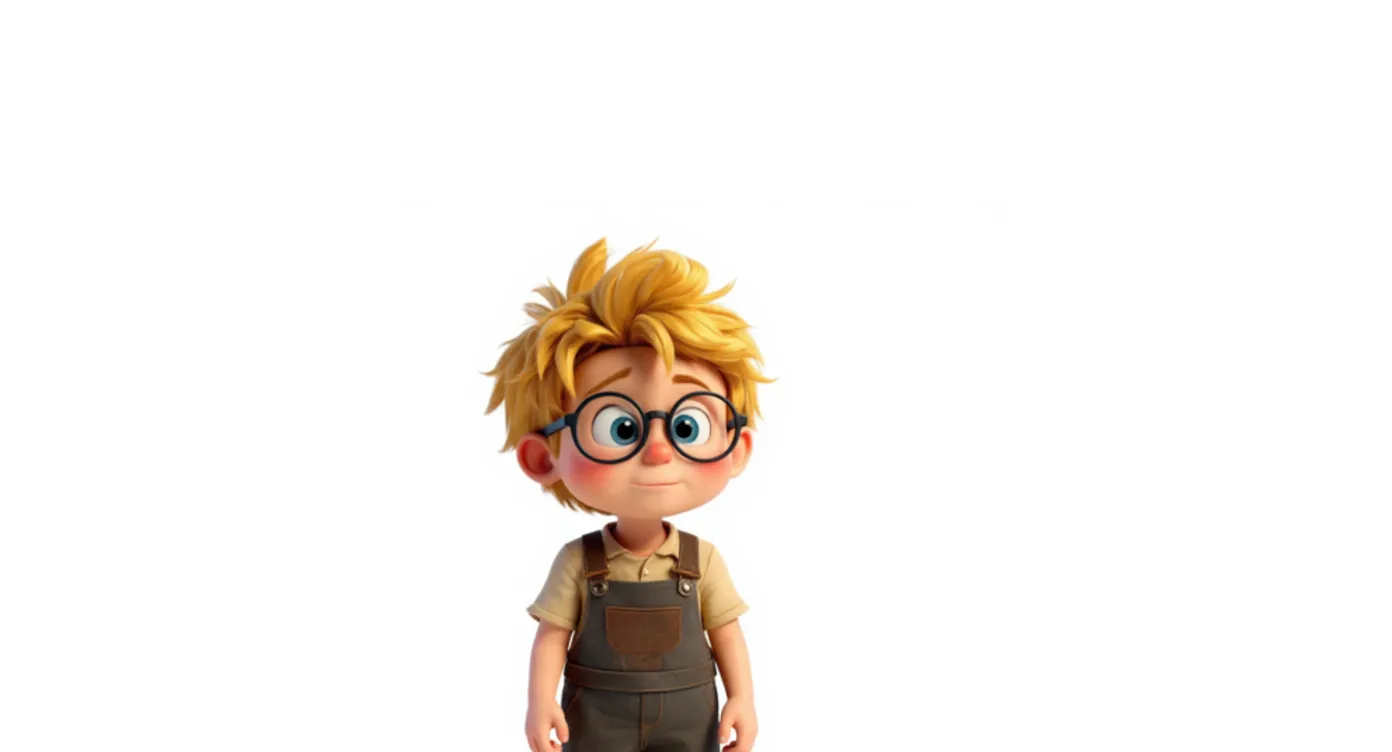

In [19]:
test_image_url = "assets/spatial-demo/reference_boy_05.webp"

image = Image.open(test_image_url)
image

1392 752
[0, 13, 28] (336, 544)


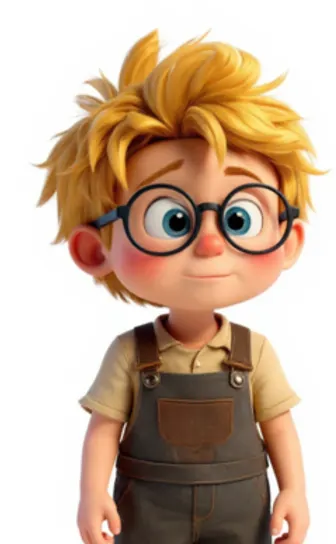

In [20]:


optimised_image, delta = optimise_image_condition(image)

print(delta, optimised_image.size)

optimised_image

